## Plot map and points on this.


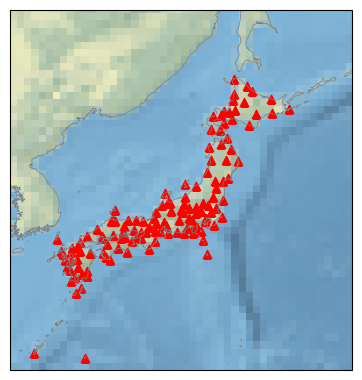

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import pandas as pd


proj =  ccrs.PlateCarree()

fig = plt.figure(figsize=(4, 4))
ax = plt.axes([.05,0.05,.9,.9], projection= proj )


ax.set_extent([126,150,25, 50])
ax.coastlines(resolution='10m',lw=.5, color='gray')

ax.stock_img()
df = pd.read_csv('data/AMeDAS_stations.csv', index_col=0)

ax.scatter(df.longitude, df.latitude, color='r', marker='^')


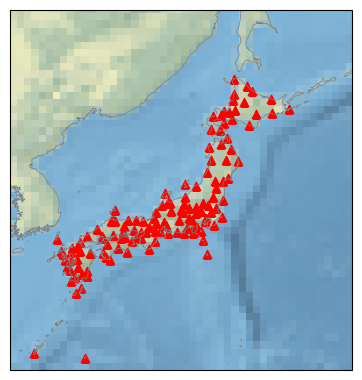

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import pandas as pd


proj =  ccrs.PlateCarree()

fig = plt.figure(figsize=(4, 4))
ax = plt.axes([.05,0.05,.9,.9], projection= proj )


ax.set_extent([126,150,25, 50])
ax.coastlines(resolution='10m',lw=.5, color='gray')

ax.stock_img()
df = pd.read_csv('data/AMeDAS_stations.csv', index_col=0)

ax.scatter(df.longitude, df.latitude, color='r', marker='^')


Text(0, 0.5, 'warming rate ($^oC$)')

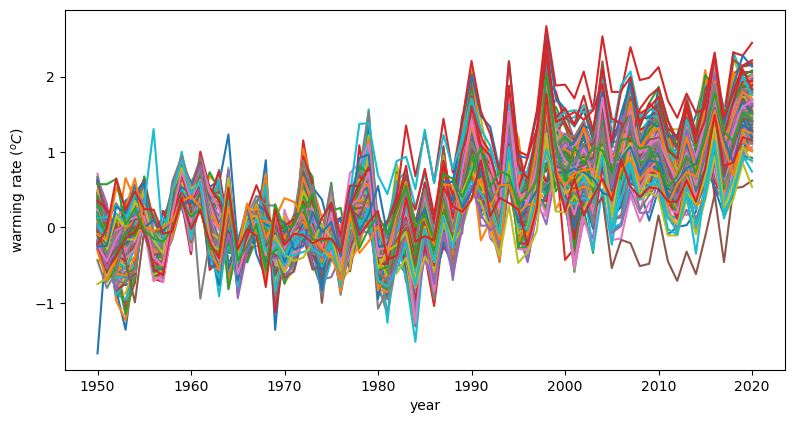

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


df = pd.read_csv('data/warming_70years_japan.csv', index_col=0)

fig = plt.figure(figsize=(8, 4))
ax = plt.axes([.05,0.05,.9,.9] )


x = df.columns.astype(int)
y = df.values.T
ax.plot(x, y)
ax.set_xlabel('year')
ax.set_ylabel('warming rate ($^oC$)')


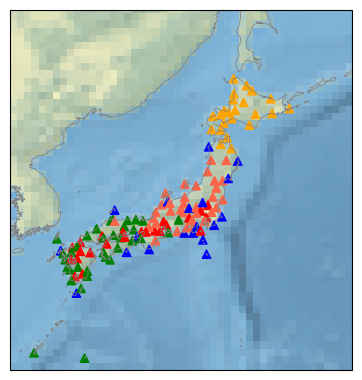

In [3]:
import sys, os
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt



df = pd.read_csv('data/warming_70years_japan.csv', index_col=0)
X = df.values

# do k-means
from sklearn.cluster import KMeans

k_means = KMeans(init="k-means++", n_clusters=5, n_init=10)
k_means.fit(X)




# plot results
import cartopy.crs as ccrs

proj =  ccrs.PlateCarree()

fig = plt.figure(figsize=(4, 4))
ax = plt.axes([.05,0.05,.9,.9], projection= proj )


ax.set_extent([126,150,25, 50])
ax.coastlines(resolution='10m',lw=.5, color='gray')

ax.stock_img()
df = pd.read_csv('data/AMeDAS_stations.csv', index_col=0)
clus = k_means.labels_


colors = ['b', 'r', 'g', 'orange', 'tomato']
    
cols = np.array(len(df) * ['k'])
for ic, c in enumerate( np.unique(clus) ): 
    cols = np.where( clus == c,  colors[ic], cols)
                
    
ax.scatter(df.longitude, df.latitude, color=cols, marker='^')
